
************************************
Program SPADEK obliczający i przedstawiający w sposób graficzny względny spadek mocy nadawanej sygnału radiowgo przy trójdrogowości. (wprost,podłoga,sufit)

In [41]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [42]:
#ZAŁOŻENIA
h11 = 1.5 #wysokość antyny nadawczej i odbioczej
h = 10 # wysokość pomiesczenia
h22 = h-h11
a_su = -0.5 #wspolczynik odbicia od sufitu
a_pd = -0.7 #wspolczynik odbicia od podlogi
f = int(5) # czestotliowas fali radiowej w GHz
f=f*10**9 #convert to GHz
display(f)
dmin = 1 #zakres odleglosci anten od
dmax = 10 # zakres odleglosci anten do
lp = 500#iczba punktow na wykresie
c = 3*np.power(10,8) #m/s zakładamy ze pokuj jest w próźni

#uwaga zakładam że dwie scieżki odbijają się na środku

5000000000

In [43]:
#obliczenia pomocnicze

#>>>>>>>>>>>>>>>>>>>
zakres=dmax - dmin
d = np.arange(dmin, dmax, zakres/(lp-1),dtype=float)
h1 = h11*np.ones(len(d)) # wektor wysokosci anteny nadawczej i odbiorczej
h2 = h22*np.ones(len(d)) # wektor wysokosci pomieszczenia
#*****************************************************************************
d1=d
d1=np.round(d1,3)
d2=2*np.sqrt(np.power(h2,2)+(d**2)/4) #odleglosc do sufitu
d2=np.round(d2,3)
d3=2*np.sqrt((h1**2)+(d**2)/4) #odleglosc do podlogi
d3 = np.round(d3,3)
#print("wektor sciezki wprost: ",d1)
#print("_____________________________________________")
#print("wektor sciezki odbicia od sufitu: ",d2)
#print("_____________________________________________")
#print("wektor sciezki odbicia od podlogi: ",d3)
#print("_____________________________________________")
fi1=np.pi*-2*f*d1/c
fi2=np.pi*-2*f*d2/c
fi3=np.pi*-2*f*d3/c




[ 0.          1.33333333  2.66666667  4.          5.33333333  6.66666667
  8.          9.33333333 10.66666667 12.        ]
[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


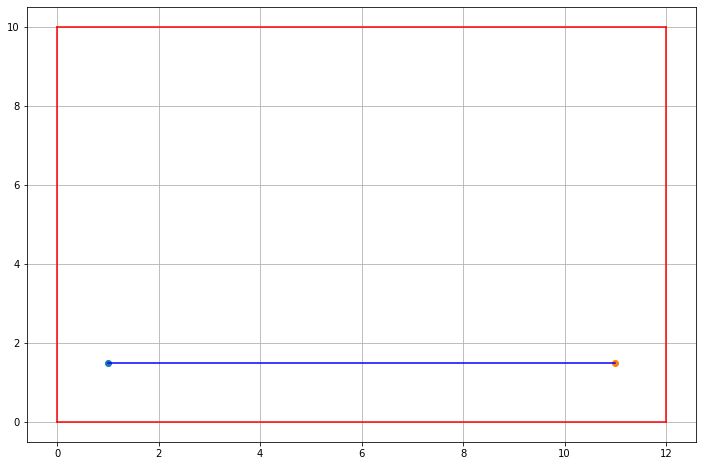

In [44]:
#model pokoju
x=np.linspace(0, dmax+2,10,dtype=float)
y=np.linspace(0,h,10,dtype=float)
print(x)
print(y)
#rys pokoju
plt.figure(figsize=(12,8))
plt.plot(x,y*0,'r')
plt.plot(x*0,y,'r')
plt.plot(x,y*0+dmax,'r')
plt.plot(x*0+dmax+2,y,'r')
#rys anten
plt.plot(1,h11,'o')
plt.plot(11,h11,'o')

#rys sciezek
f_d1=np.linspace(dmin, dmax+1, 10 ,dtype=int)
h1 = h11*np.ones(10) # wektor wysokosci anteny nadawczej i odbiorczej
h2 = h22*np.ones(10) # wektor wysokosci pomieszczenia
#f_d2=np.linspace(f_d1,y*0+h11)
#f_d3=
plt.plot(f_d1,y*0+h11,'b')
#plt.plot(f_d2,y,'y')
#plt.plot(f_d3,y,'g')
plt.grid()

In [45]:
#opóźnienia

del_tau2=(d2-d1)/c #opoźnienie propagacyjne dla ścieżki od sufitu
del_tau3=(d3-d1)/c #opoźnienie propagacyjne dla ścieżki od podłogi

drms1 = d1*d2*(d2-d1)/(c*(d1**2 + d2**2))
drms2 = d1*d3*(d3-d1)/(c*(d1**2 + d3**2))

lamb = c/f
print("_____________Długość__fali_____________")
print(lamb,"[m]")
print(lamb*100,"[cm]")
print("_______________________________________")

_____________Długość__fali_____________
0.06 [m]
6.0 [cm]
_______________________________________


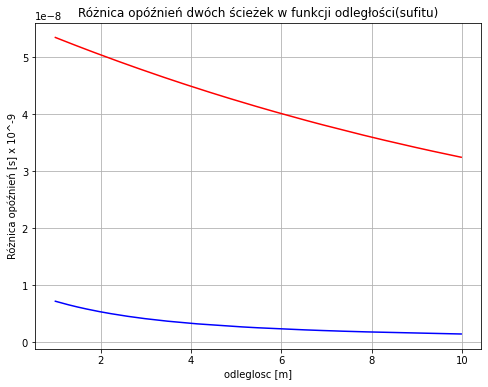

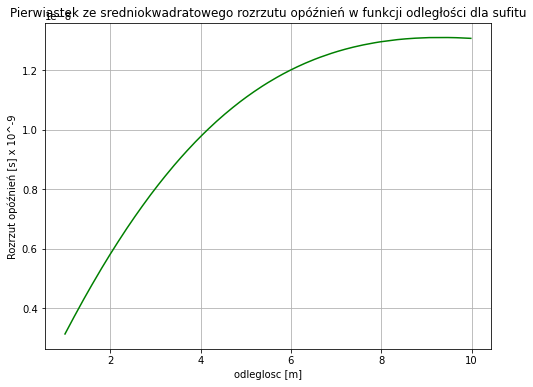

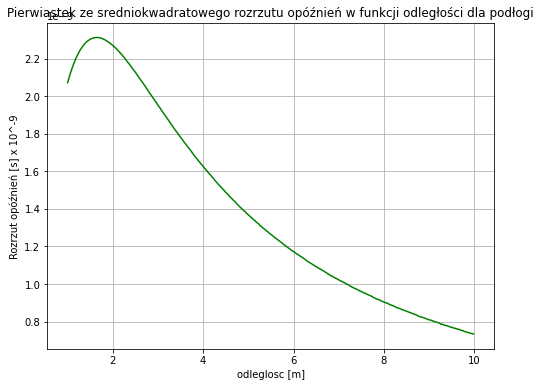

In [46]:
#wykresy opóźnień
plt.figure(figsize=(8,6))
plt.title("Różnica opóźnień dwóch ścieżek w funkcji odległości(sufitu)")
plt.xlabel("odleglosc [m]")
plt.ylabel("Różnica opóźnień [s] x 10^-9")
plt.plot(d,del_tau2,'r')
plt.plot(d,del_tau3,'b')
plt.grid()
plt.figure(figsize=(8,6))
plt.title("Pierwiastek ze sredniokwadratowego rozrzutu opóźnień w funkcji odległości dla sufitu")
plt.xlabel("odleglosc [m]")
plt.ylabel("Rozrzut opóźnień [s] x 10^-9")
plt.plot(d,drms1,'g')
plt.grid()
plt.figure(figsize=(8,6))
plt.title("Pierwiastek ze sredniokwadratowego rozrzutu opóźnień w funkcji odległości dla podłogi")
plt.xlabel("odleglosc [m]")
plt.ylabel("Rozrzut opóźnień [s] x 10^-9")
plt.plot(d,drms2,'g')
plt.grid()

A.1
Wyznacz wykres tłumienia ścieżki dla odbiornika poruszającego się w osi pokoju (osi równoległej do
dłuższej ściany, przecinającej punkt położenia anteny)

In [47]:

"""
Pr/Pt = Gt*Gr(lambda/(4*pi*d)**2) - wzór dla d>1m; Gt,Gr = 1 zysk anteny;
Pr - moc odbiorcza
Pt - moc nadawcza
stosunek tego równy tłumieniu scieżki
"""
PrPt = 1*1*(lamb/(4*np.pi*d)**2)
PrPt=np.abs(PrPt)
PrPt = 20*np.log10(PrPt)

e1=np.exp(1j*fi1)
PrP0 = np.abs(1/d*e1 )
PrP0 = 20*np.log10(PrP0)

################################################################################################


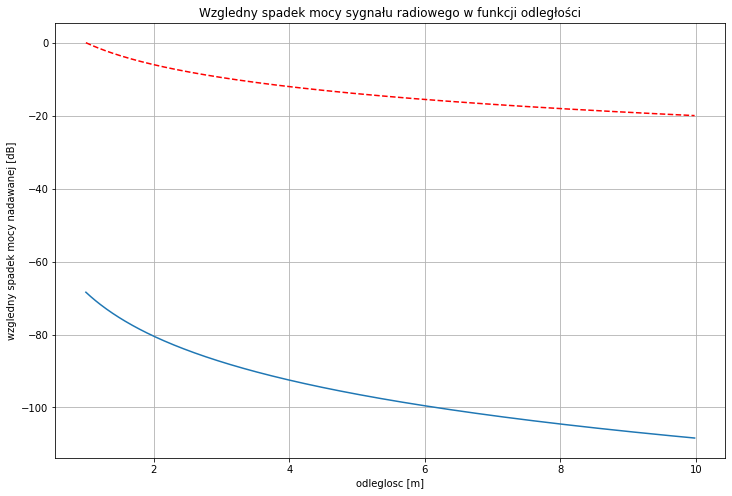

In [48]:
#  disp - A1
plt.figure(figsize=(12,8))
plt.title("Wzgledny spadek mocy sygnału radiowego w funkcji odległości")
plt.xlabel("odleglosc [m]")
plt.ylabel("wzgledny spadek mocy nadawanej [dB]")
plt.plot(d,PrPt)
plt.plot(d,PrP0,'r--')
plt.grid()
print("################################################################################################")

In [49]:
# A3
#obliczenie lp wartosci względnego spadku mocy PrP0
#PrP0 = np.abs(1/d1*np.exp(1j*fi1))
#PrP0 = 20*np.log10(PrP0)
np.seterr(divide='ignore', invalid='ignore')
e1=np.exp(1j*fi1)
e2=np.exp(1j*fi2)
e3=np.exp(1j*fi3)
PrP0 = np.abs(1/d1*e1 + a_su/d2*e2 + a_pd/d3*e3)
PrP0 = 20*np.log10(PrP0)


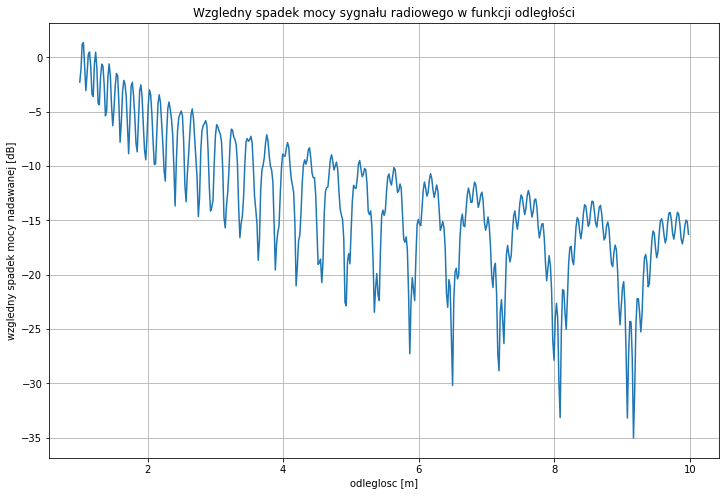

In [50]:

#plt.figure(figsize=(8,6))

#plt.subplot(211)
#plt.title("Wzgledny spadek mocy sygnału radiowego w funkcji odległości")
#plt.xlabel("odleglosc [m]")
#plt.ylabel("wzgledny spadek mocy nadawanej [dB]")
#plt.plot(d,PrP0)
 
plt.figure(figsize=(12,8))

#plt.subplot(211)
plt.title("Wzgledny spadek mocy sygnału radiowego w funkcji odległości")
plt.xlabel("odleglosc [m]")
plt.ylabel("wzgledny spadek mocy nadawanej [dB]")
#plt.xlim(-30,30)
#plt.ylim(-30,30)
plt.plot(d,PrP0)
plt.grid()